# **Introduction**: The goal of this notebook is to create a machine learning model to accurately predict cases of car insurance fraud and to understand what characterisitcs in a claim are most indicative of fraud

Data: https://www.kaggle.com/roshansharma/insurance-claim

GitHub: https://github.com/ArielJosephCohen/capstone

Presentation: https://docs.google.com/presentation/d/1oUIwD1Y3reYto43LgdyXyQJzksOHXzq6XmDgNv28LpU/edit#slide=id.p

# **Notebook**

## Imports

In [263]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
import helper_module as hm
from helper_module import *
import warnings
warnings.filterwarnings(action='ignore')

In [264]:
df = pd.read_csv('Claims.csv')
df2 = pd.read_csv('Claims.csv')

## Randomness

In [265]:
seed = 14

## Look at data

In [266]:
print(df.shape)
(df.head())

(1000, 39)


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [267]:
(df.columns)

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [268]:
(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date    

In [269]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [270]:
df.fraud_reported.value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [271]:
plt.tight_layout()
#(sns.pairplot(df))

<Figure size 432x288 with 0 Axes>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1305ad650>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

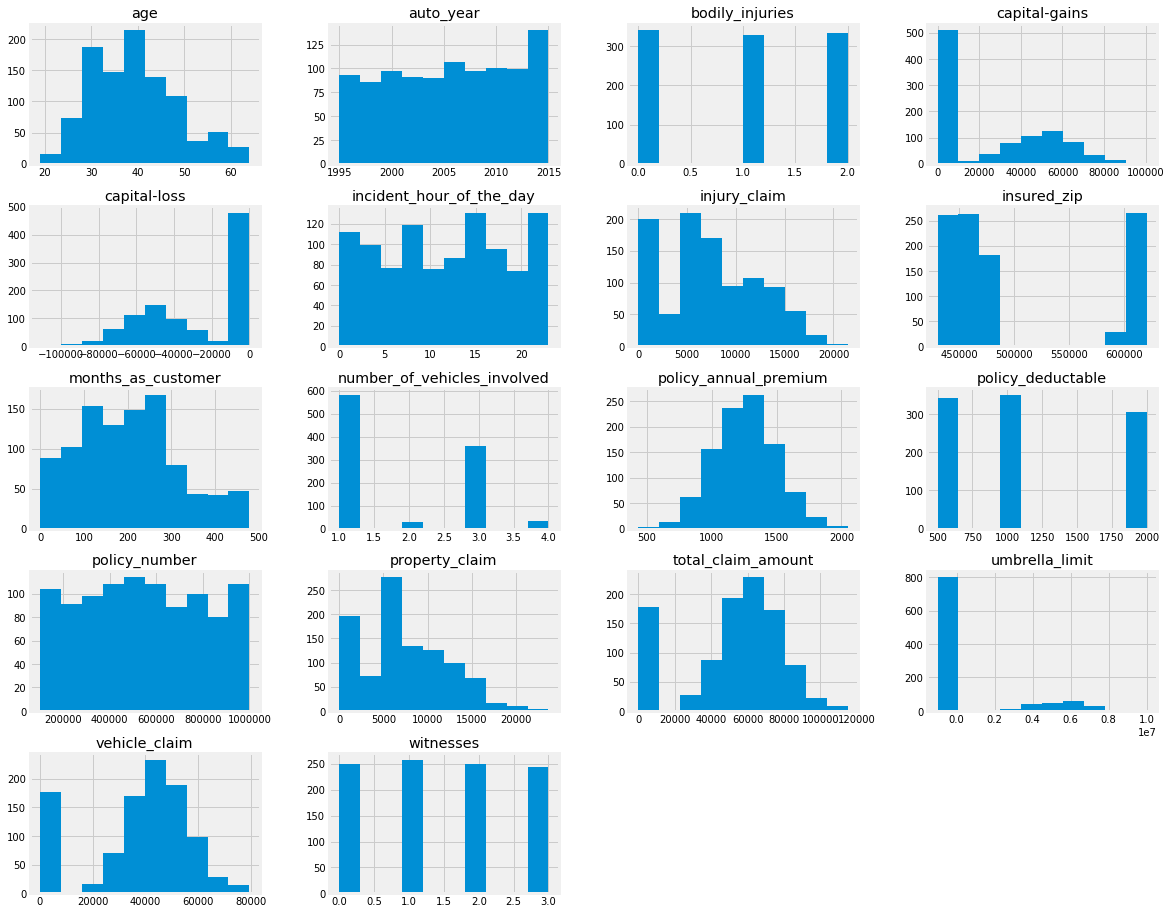

In [272]:
plt.tight_layout()
df.hist(figsize=(18,16))

## Exploratory data analysis

In [273]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [274]:
fraud_df = df[df['fraud_reported']=='Y']

In [275]:
fraud_df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
14,180,38,644081,28-12-1998,OH,250/500,2000,1301.13,0,476685,...,2,YES,46200,4200,8400,33600,Dodge,Neon,2003,Y


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12e6eacd0>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

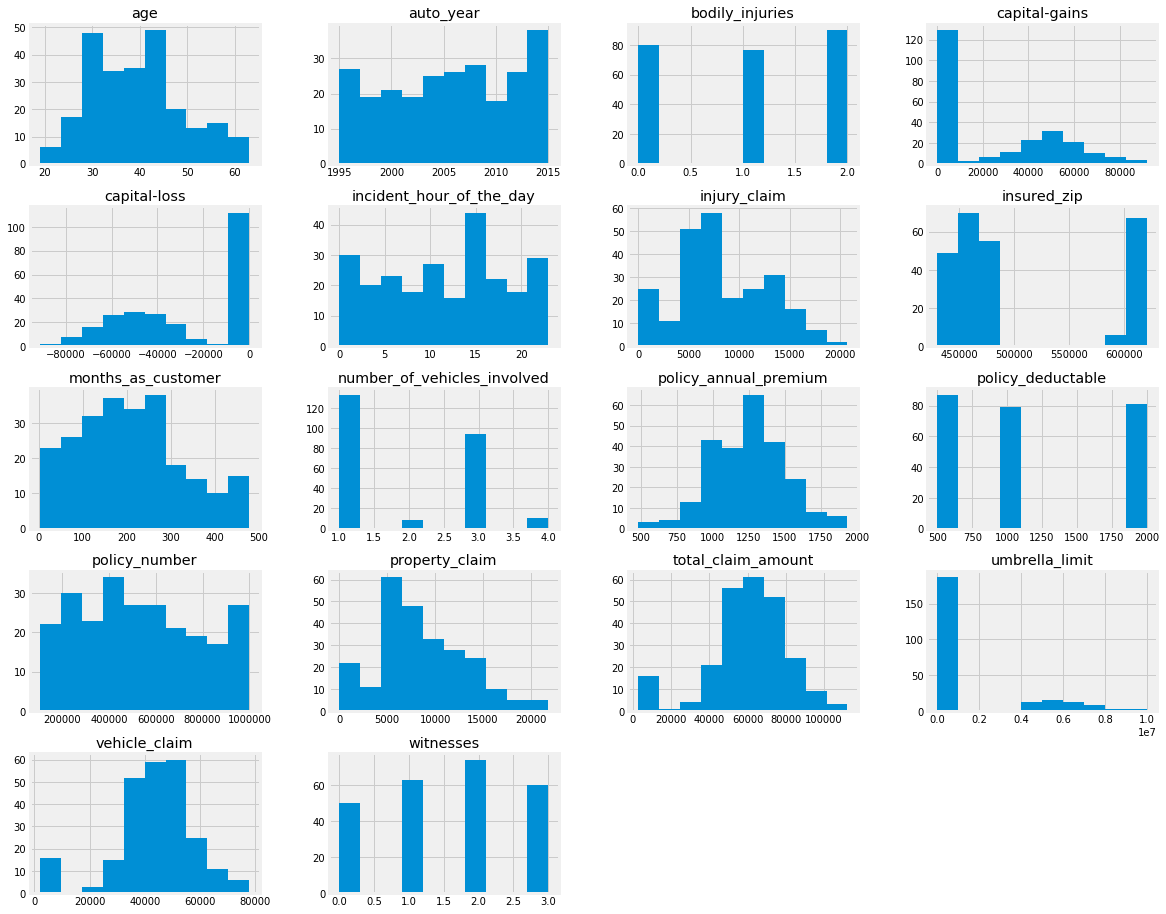

In [276]:
plt.tight_layout()
fraud_df.hist(figsize=(18,16))

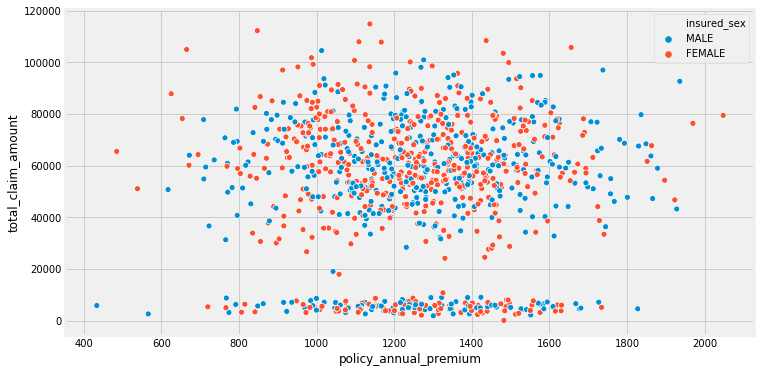

In [277]:
plt.figure(figsize=(11,6))
plt.tight_layout()
sns.scatterplot(df.policy_annual_premium,df.total_claim_amount,hue=df.insured_sex)

All


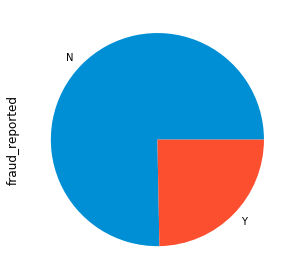

Illinois


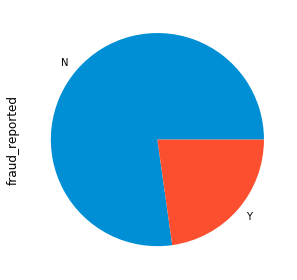

Indiana


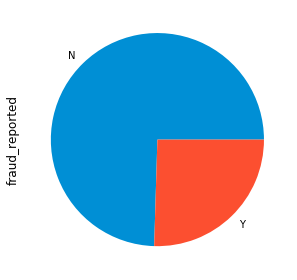

Ohio


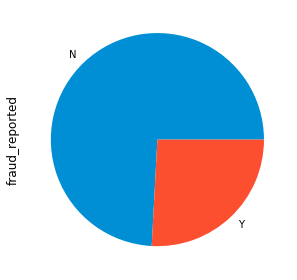

In [278]:
print('All')
df.fraud_reported.value_counts().plot(kind='pie')
plt.tight_layout()
plt.show()
print('Illinois')
df[df.policy_state=='IL'].fraud_reported.value_counts().plot(kind='pie')
plt.tight_layout()
plt.show()
print('Indiana')
df[df.policy_state=='IN'].fraud_reported.value_counts().plot(kind='pie')
plt.tight_layout()
plt.show()
print('Ohio')
df[df.policy_state=='OH'].fraud_reported.value_counts().plot(kind='pie')
plt.tight_layout()
plt.show()

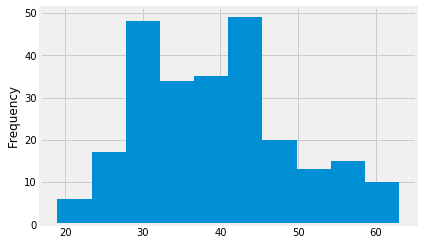

In [279]:
df[df.fraud_reported=='Y'].age.plot(kind='hist')

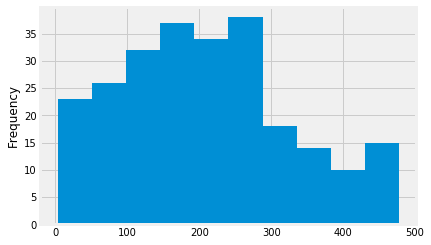

In [280]:
df[df.fraud_reported=='Y'].months_as_customer.plot(kind='hist')

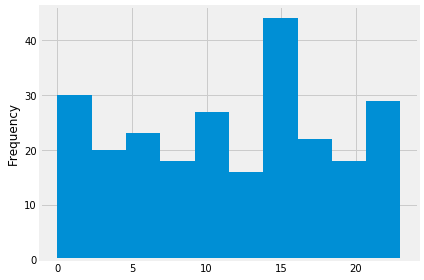

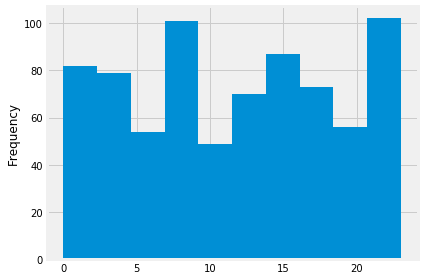

In [281]:
df[df.fraud_reported=='Y'].incident_hour_of_the_day.plot(kind='hist')
plt.tight_layout()
plt.show()
df[df.fraud_reported=='N'].incident_hour_of_the_day.plot(kind='hist')
plt.tight_layout()
plt.show()

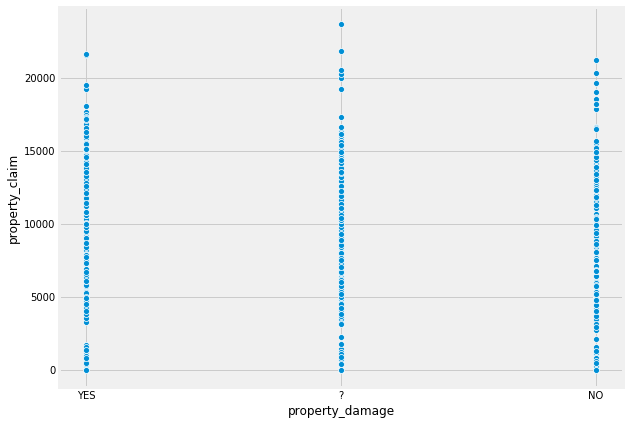

In [282]:
plt.figure(figsize=(9,7))
plt.tight_layout()
sns.scatterplot(df.property_damage,df.property_claim)

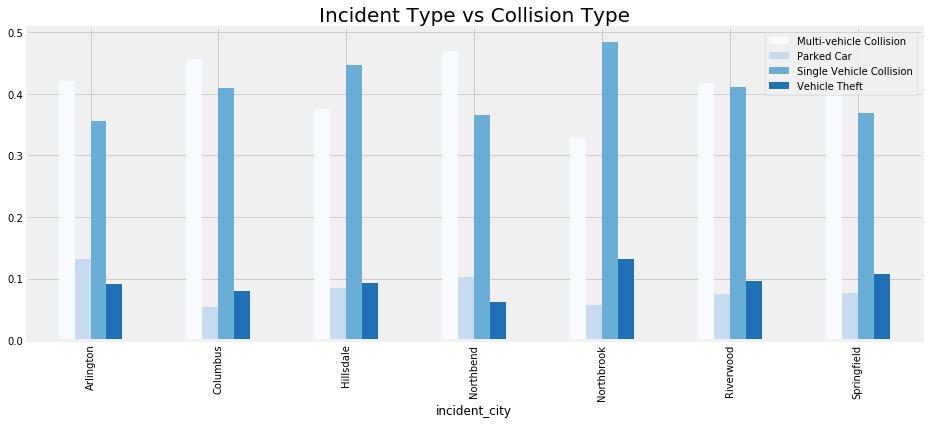

In [283]:
incident = pd.crosstab(df['incident_city'], df['incident_type'])
colors = plt.cm.Blues(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = False,
                                                           figsize = (13, 6),
                                                           color = colors)

plt.title('Incident Type vs Collision Type', fontsize = 20)
plt.tight_layout()
plt.legend()
plt.show()

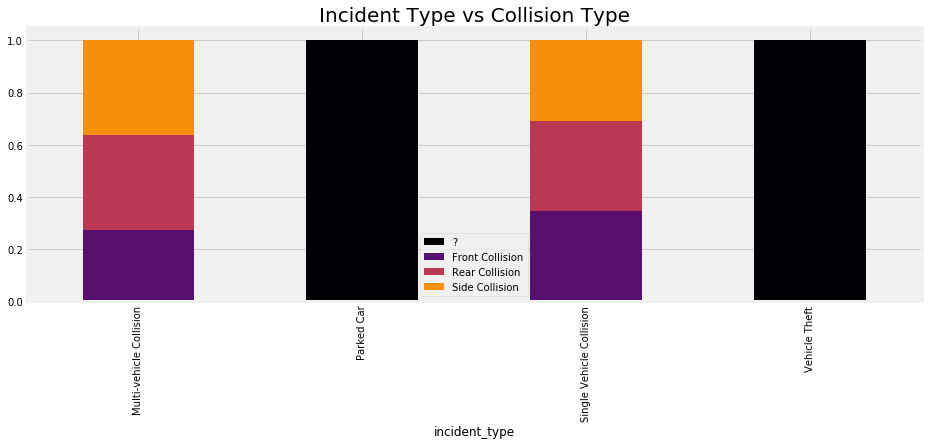

In [284]:
incident = pd.crosstab(df['incident_type'], df['collision_type'])
colors = plt.cm.inferno(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = True,
                                                           figsize = (13, 6),
                                                           color = colors)

plt.tight_layout()
plt.title('Incident Type vs Collision Type', fontsize = 20)
plt.legend()
plt.show()

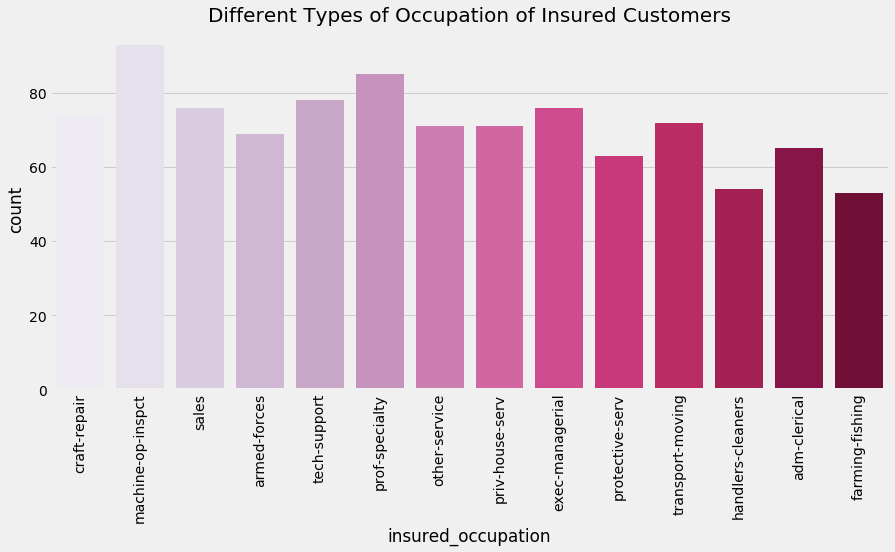

In [285]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13, 6)

sns.countplot(df['insured_occupation'], palette = 'PuRd')
plt.tight_layout()
plt.title('Different Types of Occupation of Insured Customers', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

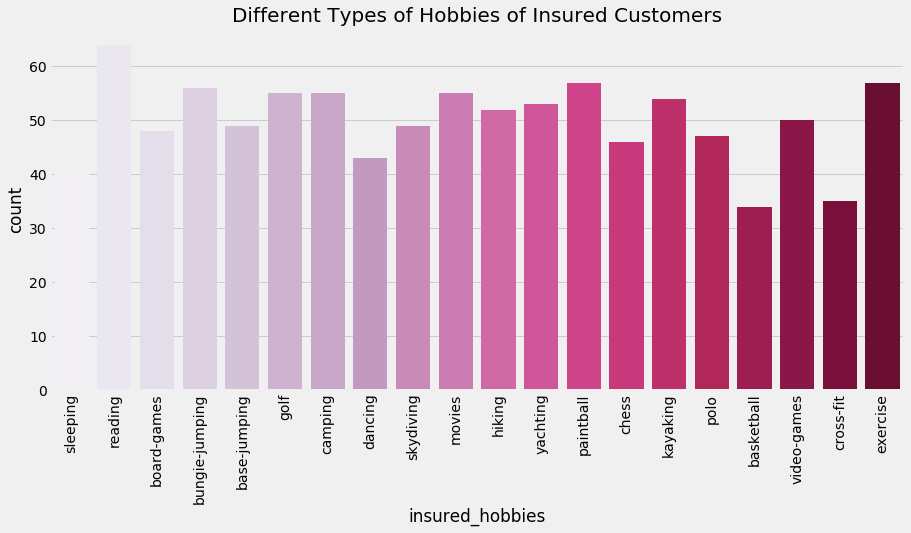

In [286]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13, 6)

sns.countplot(df['insured_hobbies'], palette = 'PuRd')
plt.tight_layout()
plt.title('Different Types of Hobbies of Insured Customers', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

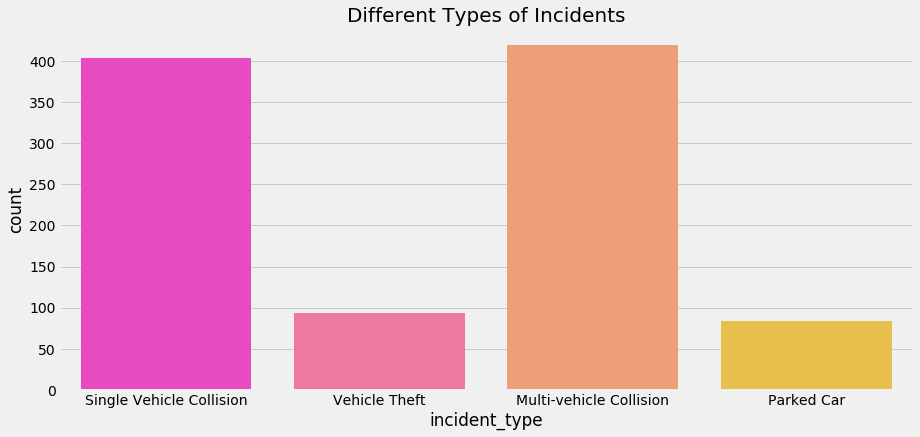

In [287]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13, 6)

sns.countplot(df['incident_type'], palette = 'spring')
plt.tight_layout()
plt.title('Different Types of Incidents', fontsize = 20)
plt.show()

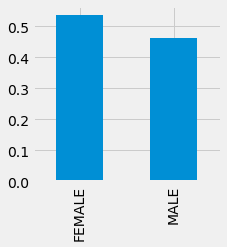

In [288]:
plt.figure(figsize=(3,3))
plt.tight_layout()
df.insured_sex.value_counts(normalize=True).plot(kind='bar')

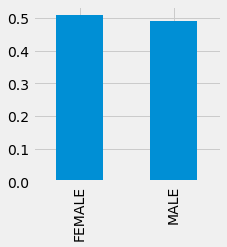

In [289]:
plt.figure(figsize=(3,3))
plt.tight_layout()
df[df.fraud_reported=='Y'].insured_sex.value_counts(normalize=True).plot(kind='bar')

## Address categorical features

In [290]:
df.auto_model.unique()

array(['92x', 'E400', 'RAM', 'Tahoe', 'RSX', '95', 'Pathfinder', 'A5',
       'Camry', 'F150', 'A3', 'Highlander', 'Neon', 'MDX', 'Maxima',
       'Legacy', 'TL', 'Impreza', 'Forrestor', 'Escape', 'Corolla',
       '3 Series', 'C300', 'Wrangler', 'M5', 'X5', 'Civic', 'Passat',
       'Silverado', 'CRV', '93', 'Accord', 'X6', 'Malibu', 'Fusion',
       'Jetta', 'ML350', 'Ultima', 'Grand Cherokee'], dtype=object)

In [291]:
auto_model_dict = {'RAM':'Truck','Wrangler':'SUV','Neon':'Sedan','A3':'Sedan','MDX':'SUV','Jetta':'Sedan',
                   'Passat':'Sedan','A5':'Sedan', 'legacy':'Sedan','Pathfinder':'SUV','Malibu':'Sedan',
                   'Camry':'Sedan','Forrester':'SUV','92x':'Sedan','95':'Sedan','E400':'Sedan','F150':'Truck',
                   'Grand Cherokee':'SUV','93':'Sedan','Tahoe':'SUV','Escape':'SUV','Maxima':'Sedan','X5':'SUV',
                   'Ultima':'Sedan','Civic':'Sedan','Highlander':'SUV','Silverado':'Truck','Fusion':'Sedan',
                   'ML350':'SUV','Corolla':'Sedan','TL':'Sedan','CRV':'SUV','Impreza':'Sedan','3 Series':'Sedan',
                   'C300':'Sedan','X6':'SUV','M5':'Sedan','Accord':'Sedan','RSX':'Sedan','Legacy':'Sedan',
                   'Forrestor':'SUV'
                  }

In [292]:
df.auto_model=df.auto_model.map(lambda x: auto_model_dict[x])

In [293]:
df.auto_model.unique()

array(['Sedan', 'Truck', 'SUV'], dtype=object)

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date    

In [295]:
num_list = ['months_as_customer','age','policy_deductable','policy_annual_premium','umbrella_limit','capital-gains','capital-loss','incident_hour_of_the_day','number_of_vehicles_involved','witnesses','bodily_injuries','total_claim_amount','injury_claim','property_claim','vehicle_claim','auto_year']

In [296]:
cat_list = ['policy_bind_date','policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_date','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','property_damage','police_report_available','auto_make','auto_model','fraud_reported']

In [297]:
cat_cols = []
cat_col_vals = []
for col in cat_list[1:]:
    cat_cols.append(col) 
    cat_col_vals.append(df[col].nunique())
    print (col,df[col].nunique())

policy_state 3
policy_csl 3
insured_sex 2
insured_education_level 7
insured_occupation 14
insured_hobbies 20
insured_relationship 6
incident_date 60
incident_type 4
collision_type 4
incident_severity 4
authorities_contacted 5
incident_state 7
incident_city 7
property_damage 3
police_report_available 3
auto_make 14
auto_model 3
fraud_reported 2


<Figure size 1080x576 with 0 Axes>

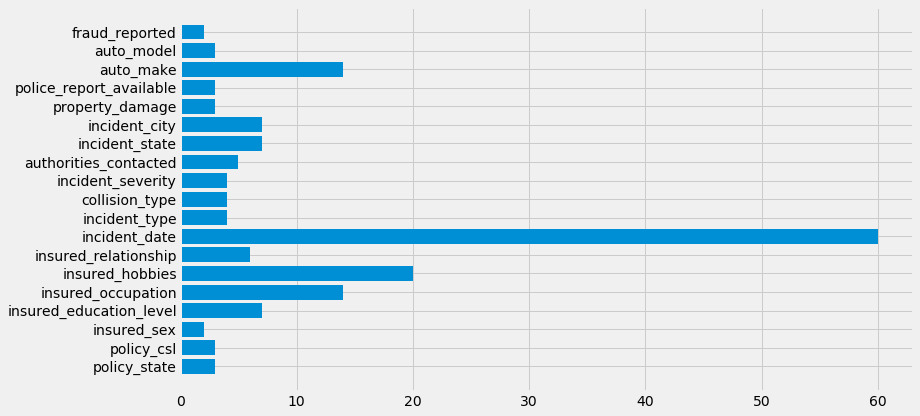

<Figure size 1080x576 with 0 Axes>

In [298]:
plt.barh(cat_cols,cat_col_vals)
plt.tight_layout()
plt.figure(figsize=(15,8))

In [299]:
df[cat_list].head()

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,17-10-2014,OH,250/500,MALE,MD,craft-repair,sleeping,husband,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,YES,YES,Saab,Sedan,Y
1,27-06-2006,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,?,?,Mercedes,Sedan,Y
2,06-09-2000,OH,100/300,FEMALE,PhD,sales,board-games,own-child,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,NO,NO,Dodge,Truck,N
3,25-05-1990,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,?,NO,Chevrolet,SUV,Y
4,06-06-2014,IL,500/1000,MALE,Associate,sales,board-games,unmarried,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,NO,NO,Accura,Sedan,N


In [300]:
df.policy_bind_date=pd.to_datetime(df.policy_bind_date)

In [301]:
def gender_val(row):
    if row['insured_sex'] == 'MALE':
        return 1
    else:
        return 0

In [302]:
df['insured_sex']=df.apply(gender_val,axis=1)

In [303]:
df.incident_date=pd.to_datetime(df.incident_date)

In [304]:
df['timeline']=df.incident_date-df.policy_bind_date

In [305]:
df[num_list].head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,bodily_injuries,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
0,328,48,1000,1406.91,0,53300,0,5,1,2,1,71610,6510,13020,52080,2004
1,228,42,2000,1197.22,5000000,0,0,8,1,0,0,5070,780,780,3510,2007
2,134,29,2000,1413.14,5000000,35100,0,7,3,3,2,34650,7700,3850,23100,2007
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,2,1,63400,6340,6340,50720,2014
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,1,0,6500,1300,650,4550,2009


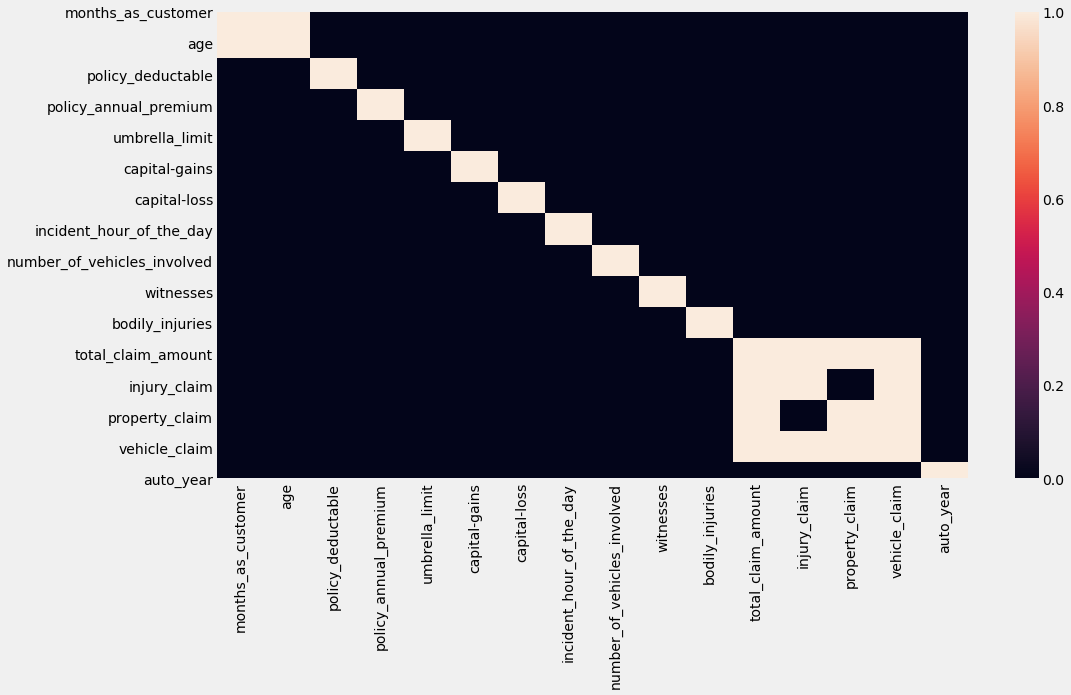

In [306]:
plt.figure(figsize=(15,8))
plt.tight_layout()
sns.heatmap(df[num_list].corr()>=0.7)

In [307]:
df.drop(['age','total_claim_amount'],axis=1,inplace=True)
num_list.remove('age')
num_list.remove('total_claim_amount')
num_list.remove('vehicle_claim')
df.drop(['vehicle_claim'],axis=1,inplace=True)

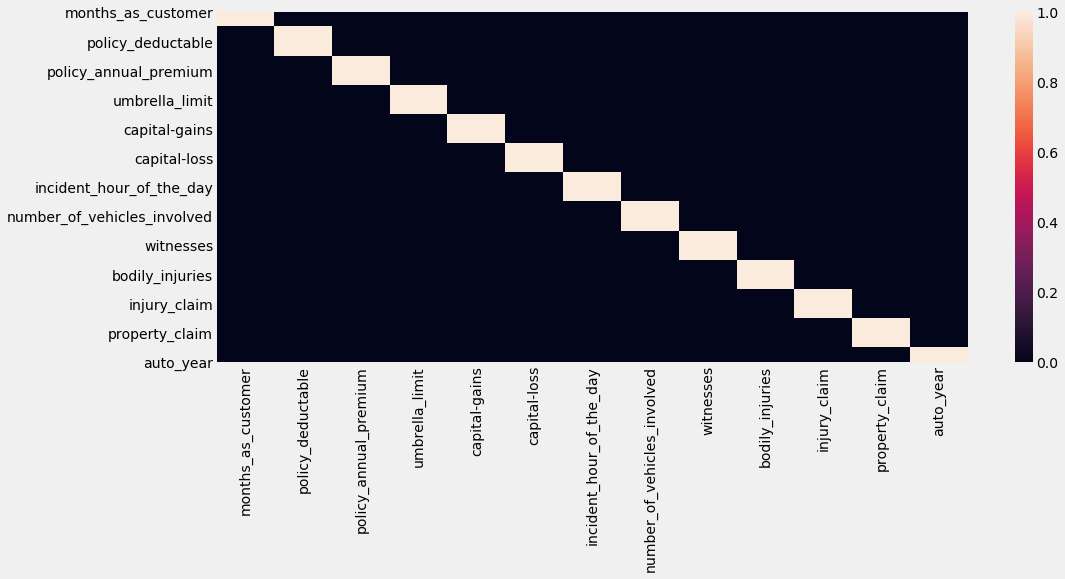

In [308]:
plt.figure(figsize=(15,6))
plt.tight_layout()
sns.heatmap(df[num_list].corr()>=0.7)

In [309]:
int(str(df.timeline[0]).split()[0])

100

In [310]:
for i in range(len(df)):
    df.timeline[i] = int(str(df.timeline[i]).split()[0])

In [311]:
df.head()

,months_as_customer,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,auto_make,auto_model,auto_year,fraud_reported,timeline
0,328,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,1,...,1,2,YES,6510,13020,Saab,Sedan,2004,Y,100
1,228,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,1,...,0,0,?,780,780,Mercedes,Sedan,2007,Y,3130
2,134,687698,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,0,...,2,3,NO,7700,3850,Dodge,Truck,2007,N,5371
3,256,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,0,...,1,2,NO,6340,6340,Chevrolet,SUV,2014,Y,9260
4,228,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,1,...,0,1,NO,1300,650,Accura,Sedan,2009,N,256


In [312]:
num_list.append('timeline')

In [313]:
df_num = df[num_list]
df_cat = df[cat_list]

In [314]:
print(df_num.shape)
df_num.head()

(1000, 14)


,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,bodily_injuries,injury_claim,property_claim,auto_year,timeline
0,328,1000,1406.91,0,53300,0,5,1,2,1,6510,13020,2004,100
1,228,2000,1197.22,5000000,0,0,8,1,0,0,780,780,2007,3130
2,134,2000,1413.14,5000000,35100,0,7,3,3,2,7700,3850,2007,5371
3,256,2000,1415.74,6000000,48900,-62400,5,1,2,1,6340,6340,2014,9260
4,228,1000,1583.91,6000000,66000,-46000,20,1,1,0,1300,650,2009,256


In [315]:
print(df_cat.shape)
df_cat.head()

(1000, 20)


,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,2014-10-17,OH,250/500,1,MD,craft-repair,sleeping,husband,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,YES,YES,Saab,Sedan,Y
1,2006-06-27,IN,250/500,1,MD,machine-op-inspct,reading,other-relative,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,?,?,Mercedes,Sedan,Y
2,2000-06-09,OH,100/300,0,PhD,sales,board-games,own-child,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,NO,NO,Dodge,Truck,N
3,1990-05-25,IL,250/500,0,PhD,armed-forces,board-games,unmarried,2015-10-01,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,?,NO,Chevrolet,SUV,Y
4,2014-06-06,IL,500/1000,1,Associate,sales,board-games,unmarried,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,NO,NO,Accura,Sedan,N


In [316]:
csl_df = pd.get_dummies(df_cat.policy_csl,drop_first=True)
csl_df.head(1)

,250/500,500/1000
0,1,0


In [317]:
education_df = pd.get_dummies(df_cat.insured_education_level,drop_first=True)

In [318]:
occupation_df = pd.get_dummies(df_cat.insured_occupation,drop_first=True)

In [319]:
hobbies_df =pd.get_dummies(df_cat.insured_hobbies,drop_first=True)

In [320]:
relationship_df=pd.get_dummies(df_cat.insured_relationship,drop_first=True)

In [321]:
incident_type_df=pd.get_dummies(df_cat.incident_type,drop_first=True)

In [322]:
collision_df=pd.get_dummies(df_cat.collision_type,drop_first=True)

In [323]:
severity_df=pd.get_dummies(df_cat.incident_severity,drop_first=True)

In [324]:
authorities_df=pd.get_dummies(df_cat.authorities_contacted,drop_first=True)

In [325]:
state_df=pd.get_dummies(df_cat.incident_state,drop_first=True)

In [326]:
city_df=pd.get_dummies(df_cat.incident_city,drop_first=True)

In [327]:
pd_df=pd.get_dummies(df_cat.property_damage,drop_first=True,prefix='prop_dam')
pd_df.drop('prop_dam_NO',axis=1,inplace=True)
pd_df.head(1)

,prop_dam_YES
0,1


In [328]:
pra_df =state_df=pd.get_dummies(df_cat.police_report_available,drop_first=True,prefix='police_report')
pra_df.drop('police_report_NO',axis=1,inplace=True)
pra_df.head(1)

,police_report_YES
0,1


In [329]:
make_df =state_df=pd.get_dummies(df_cat.auto_make,drop_first=True)

In [330]:
model_df=state_df=pd.get_dummies(df_cat.auto_model,drop_first=True)

In [331]:
dum_df_list=[csl_df,education_df,occupation_df,hobbies_df,relationship_df,incident_type_df,collision_df,severity_df,authorities_df,state_df,city_df,pd_df,pra_df,make_df]

In [332]:
for dfr in dum_df_list:
    for col in dfr.columns:
        df_cat[col]=dfr[col]

In [333]:
df_cat.drop(['policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','property_damage','police_report_available','auto_make','auto_model'],axis=1,inplace=True)

In [334]:
print(df_cat.shape)
df_cat.head()

(1000, 84)


,policy_bind_date,incident_date,fraud_reported,250/500,500/1000,College,High School,JD,MD,Masters,...,Dodge,Ford,Honda,Jeep,Mercedes,Nissan,Saab,Suburu,Toyota,Volkswagen
0,2014-10-17,2015-01-25,Y,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,2006-06-27,2015-01-21,Y,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,2000-06-09,2015-02-22,N,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1990-05-25,2015-10-01,Y,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014-06-06,2015-02-17,N,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [335]:
print(df.shape)
df.head()

(1000, 37)


,months_as_customer,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,auto_make,auto_model,auto_year,fraud_reported,timeline
0,328,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,1,...,1,2,YES,6510,13020,Saab,Sedan,2004,Y,100
1,228,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,1,...,0,0,?,780,780,Mercedes,Sedan,2007,Y,3130
2,134,687698,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,0,...,2,3,NO,7700,3850,Dodge,Truck,2007,N,5371
3,256,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,0,...,1,2,NO,6340,6340,Chevrolet,SUV,2014,Y,9260
4,228,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,1,...,0,1,NO,1300,650,Accura,Sedan,2009,N,256


In [336]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [237]:
#for col in df_num.columns:
#    df_num[col] = ss.fit_transform(df_num[[col]])

In [337]:
#for col in df_num.columns:
#    df_num[col]=list(stats.boxcox(abs(df_num[col]+0.5)))[0]

In [338]:
print(df_num.shape)
df_num.head()

(1000, 14)


,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,bodily_injuries,injury_claim,property_claim,auto_year,timeline
0,328,1000,1406.91,0,53300,0,5,1,2,1,6510,13020,2004,100
1,228,2000,1197.22,5000000,0,0,8,1,0,0,780,780,2007,3130
2,134,2000,1413.14,5000000,35100,0,7,3,3,2,7700,3850,2007,5371
3,256,2000,1415.74,6000000,48900,-62400,5,1,2,1,6340,6340,2014,9260
4,228,1000,1583.91,6000000,66000,-46000,20,1,1,0,1300,650,2009,256


In [339]:
df_atg = df_num.copy()
for col in df_cat.columns:
    df_atg[col]=df_cat[col]

In [340]:
df_atg['policy_bind_month']=0
df_atg['policy_bind_year']=0
df_atg['incident_month']=0
df_atg['incident_year']=0

In [341]:
for i in range(len(df_atg)):
    df_atg['policy_bind_month'][i]=int(str(df_atg.incident_date[i]).split()[0][5:7])
    df_atg['policy_bind_year'][i]= int(str(df_atg.incident_date[i]).split()[0][0:4])
    df_atg['incident_month'][i]= int(str(df_atg.policy_bind_date[i]).split()[0][5:7])
    df_atg['incident_year'][i]= int(str(df_atg.policy_bind_date[i]).split()[0][0:4])

In [342]:
df_atg.drop(['incident_date','policy_bind_date'],axis=1,inplace=True)

In [343]:
print(df_atg.shape)
df_atg.head()

(1000, 100)


,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,bodily_injuries,...,Mercedes,Nissan,Saab,Suburu,Toyota,Volkswagen,policy_bind_month,policy_bind_year,incident_month,incident_year
0,328,1000,1406.91,0,53300,0,5,1,2,1,...,0,0,1,0,0,0,1,2015,10,2014
1,228,2000,1197.22,5000000,0,0,8,1,0,0,...,1,0,0,0,0,0,1,2015,6,2006
2,134,2000,1413.14,5000000,35100,0,7,3,3,2,...,0,0,0,0,0,0,2,2015,6,2000
3,256,2000,1415.74,6000000,48900,-62400,5,1,2,1,...,0,0,0,0,0,0,10,2015,5,1990
4,228,1000,1583.91,6000000,66000,-46000,20,1,1,0,...,0,0,0,0,0,0,2,2015,6,2014


In [344]:
i_month_df=pd.get_dummies(df_atg.incident_month,prefix='in-month',drop_first=True)

In [345]:
i_year_df=pd.get_dummies(df_atg.incident_year,prefix='in-year',drop_first=True)

In [346]:
p_month_df=pd.get_dummies(df_atg.policy_bind_month,prefix='pol-month',drop_first=True)

In [347]:
p_year_df=pd.get_dummies(df_atg.policy_bind_year,prefix='pol-year',drop_first=True)

In [348]:
moyear_lst=[p_month_df,p_year_df,i_month_df,i_month_df]

In [349]:
for dfra in moyear_lst:
    for col in dfra.columns:
        df_atg[col]=dfra[col]

In [350]:
round(df_atg.fraud_reported.value_counts(normalize=True),2)

N    0.75
Y    0.25
Name: fraud_reported, dtype: float64

In [360]:
def assign_fraud_binary(row):
    if row['fraud_reported'] == 'Y':
        return 1
    else:
        return 0

In [361]:
df_atg['fraud_reported']=df_atg.apply(assign_fraud_binary,axis=1)

## Train-Test-Split

In [362]:
X = df_atg.drop('fraud_reported',axis=1)
y = df_atg.fraud_reported

In [363]:
from sklearn.model_selection import train_test_split

In [364]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=seed,test_size=0.25)

In [365]:
print(X_test.shape,X_train.shape)

(250, 121) (750, 121)


In [366]:
print('Do shapes match?')
print(X_test.shape[0]==y_test.shape[0])
print(X_train.shape[0]==y_train.shape[0])

Do shapes match?
True
True


In [367]:
for col in num_list:
    X_train[col] = ss.fit_transform(X_train[[col]])

## PCA

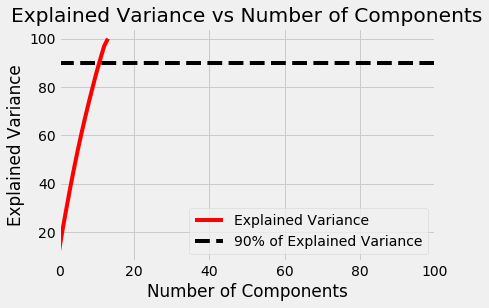

In [417]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train[num_list])
cumsum = np.cumsum(pca.explained_variance_ratio_)*100
d = [n for n in range(len(cumsum))]
plt.figure(figsize=(6,4))
plt.plot(d, cumsum, color='red', label = 'Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.ylabel('Explained Variance')
plt.xlabel('Number of Components')
plt.axhline(y = 90, color='k', linestyle='--', label = '90% of Explained Variance')
plt.xlim(0,100)
plt.legend(loc='best');

In [420]:
print('10 components')

10 components


## Transformaton and filter outliers

In [ ]:
df_post_pca =  pd.concat([X_train, y_train], axis=1)

In [ ]:
for col in num_list:
    df_post_pca[col]=list(stats.boxcox(abs(df_post_pca[col]+0.5)))[0]

In [ ]:
df_post_pca = df_post_pca[(np.abs(stats.zscore(df_post_pca[num_list])) <= 2.5).all(axis=1)]
print(df_post_pca.shape)
df_post_pca.head()

In [ ]:
X = df_post_pca.drop('fraud_reported',axis=1)
y = df_post_pca.fraud_reported

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=seed,test_size=0.25)

In [ ]:
print('Do shapes match?')
print(X_test.shape[0]==y_test.shape[0])
print(X_train.shape[0]==y_train.shape[0])

## Address imbalance in target feature

In [368]:
training  = pd.concat([X_train, y_train], axis=1)

In [369]:
round(training.fraud_reported.value_counts(normalize=True),2)

0    0.75
1    0.25
Name: fraud_reported, dtype: float64

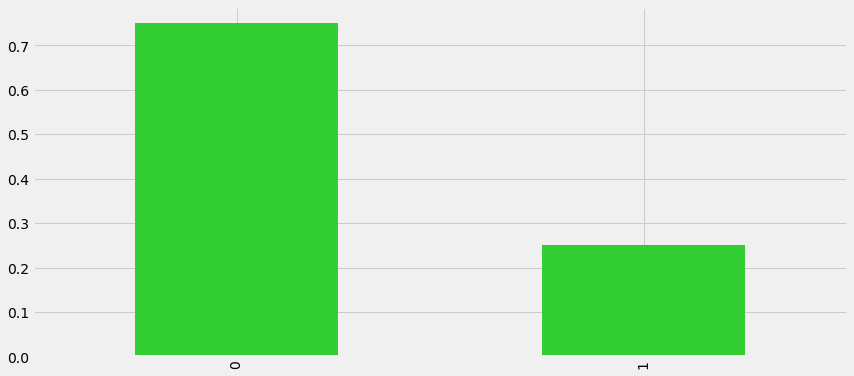

In [370]:
plt.tight_layout()
round(training.fraud_reported.value_counts(normalize=True),2).plot(kind='bar',color='limegreen')

In [371]:
from sklearn.utils import resample

In [372]:
true = training[training.fraud_reported==0]
fraud = training[training.fraud_reported==1]

In [373]:
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(true), # match number in majority class
                          random_state=seed) # reproducible results

In [374]:
upsampled = pd.concat([true, fraud_upsampled])

In [375]:
upsampled.fraud_reported.value_counts()

1    561
0    561
Name: fraud_reported, dtype: int64

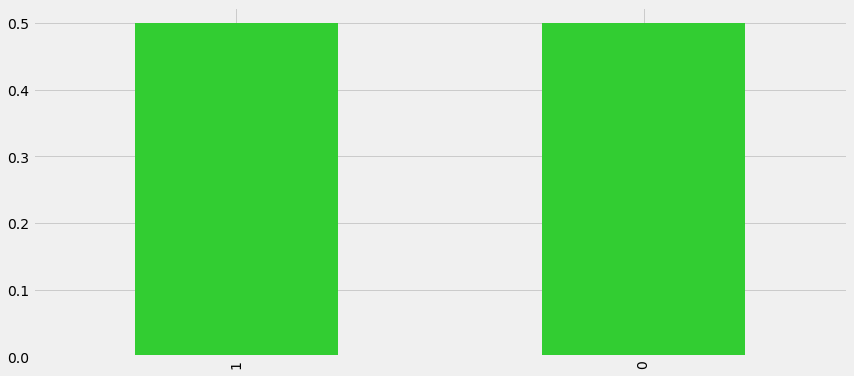

In [376]:
plt.tight_layout()
round(upsampled.fraud_reported.value_counts(normalize=True),2).plot(kind='bar',color='limegreen')

In [377]:
print(upsampled.shape)
upsampled.head()

(1122, 122)


,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,bodily_injuries,...,in-month_4,in-month_5,in-month_6,in-month_7,in-month_8,in-month_9,in-month_10,in-month_11,in-month_12,fraud_reported
176,-0.415304,-1.032366,1.867243,-0.489031,-0.936304,0.961271,-1.551879,-0.819618,-0.464261,0.016235,...,0,0,0,0,0,1,0,0,0,0
610,0.854949,-0.206032,-2.232246,-0.489031,-0.936304,0.961271,-1.265414,1.150617,-1.361673,0.016235,...,0,0,0,0,0,0,0,0,0,0
953,0.219823,1.446635,1.369009,-0.489031,0.593174,-0.599493,-1.265414,-0.819618,-1.361673,0.016235,...,0,0,1,0,0,0,0,0,0,0
224,0.322816,1.446635,-1.023788,-0.489031,-0.936304,0.961271,1.599242,1.150617,1.330562,-1.201387,...,0,1,0,0,0,0,0,0,0,0
87,-0.595543,-1.032366,1.479504,-0.489031,0.370574,0.961271,-1.408647,-0.819618,-0.464261,1.233857,...,0,0,0,0,0,0,0,0,0,0


In [378]:
y_train = upsampled.fraud_reported
X_train = upsampled.drop('fraud_reported', axis=1)

In [379]:
print(X_test.shape[0]==y_test.shape[0])
print(X_train.shape[0]==y_train.shape[0])

True
True


## Initial Models

In [380]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

# metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

#### add grid search to each model above tomorrow feb 3rd

In [381]:
# Logistic Regression
logreg = LogisticRegression(random_state=seed)
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_test, y_test) * 100, 2)
p_score = round(precision_score(y_test,Y_pred,average='binary')*100,2)
r_score = round(recall_score(y_test,Y_pred,average='binary')*100,2)
f1 = round(f1_score(y_test,Y_pred,average='binary')*100,2)
print(f'Score: {acc_log}, Precision: {p_score}, Recall: {r_score} F1-Score {f1}')

Score: 62.8, Precision: 27.27, Recall: 36.21 F1-Score 31.11


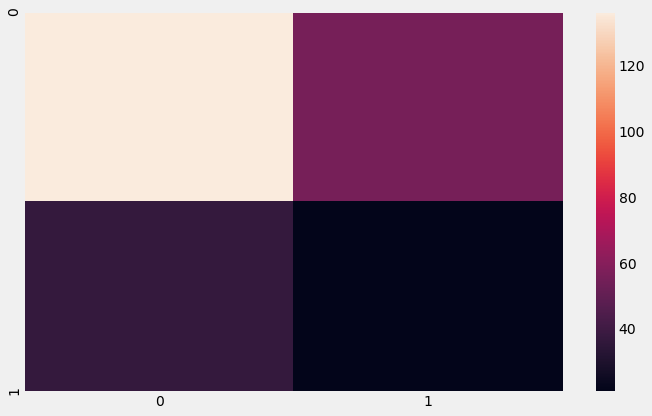

In [382]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, Y_pred))
plt.tight_layout()

In [383]:
fpr, tpr, threshold = roc_curve(y_test, Y_pred)
print(auc(fpr,tpr), threshold)

0.5352011494252873 [2 1 0]


In [384]:
# Support Vector Machine
svc = SVC(random_state=seed)
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_test, y_test) * 100, 2)
p_score = round(precision_score(y_test,Y_pred,average='binary')*100,2)
r_score = round(recall_score(y_test,Y_pred,average='binary')*100,2)
f1 = round(f1_score(y_test,Y_pred,average='binary')*100,2)
print(f'Score: {acc_svc}, Precision: {p_score}, Recall: {r_score} F1-Score {f1}')

Score: 73.6, Precision: 0.0, Recall: 0.0 F1-Score 0.0


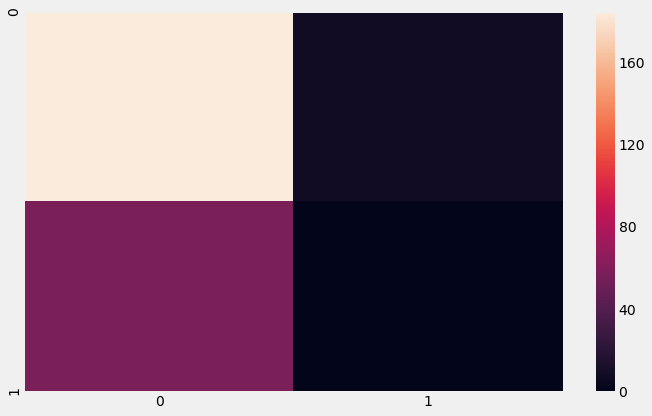

In [385]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, Y_pred))
plt.tight_layout()

In [386]:
fpr, tpr, threshold = roc_curve(y_test, Y_pred)
print(auc(fpr,tpr), threshold)

0.4791666666666667 [2 1 0]


In [387]:
# kNN

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_test, y_test) * 100, 2)
acc_knn
p_score = round(precision_score(y_test,Y_pred,average='binary')*100,2)
r_score = round(recall_score(y_test,Y_pred,average='binary')*100,2)
f1 = round(f1_score(y_test,Y_pred,average='binary')*100,2)
print(f'Score: {acc_knn}, Precision: {p_score}, Recall: {r_score} F1-Score {f1}')

Score: 58.8, Precision: 25.27, Recall: 39.66 F1-Score 30.87


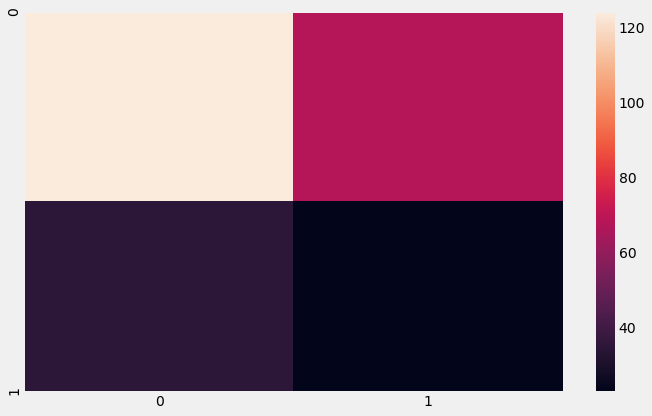

In [388]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, Y_pred))
plt.tight_layout()

In [389]:
fpr, tpr, threshold = roc_curve(y_test, Y_pred)
print(auc(fpr,tpr), threshold)

0.5211925287356322 [2 1 0]


In [390]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_test, y_test) * 100, 2)
acc_gaussian
p_score = round(precision_score(y_test,Y_pred,average='binary')*100,2)
r_score = round(recall_score(y_test,Y_pred,average='binary')*100,2)
f1 = round(f1_score(y_test,Y_pred,average='binary')*100,2)
print(f'Score: {acc_gaussian}, Precision: {p_score}, Recall: {r_score} F1-Score {f1}')

Score: 63.6, Precision: 30.12, Recall: 43.1 F1-Score 35.46


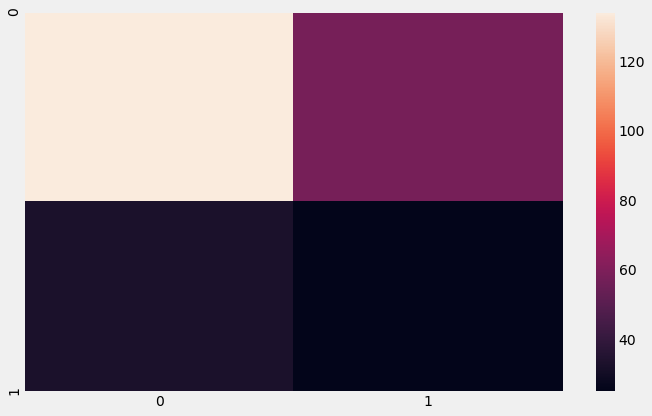

In [391]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, Y_pred))
plt.tight_layout()

In [392]:
fpr, tpr, threshold = roc_curve(y_test, Y_pred)
print(auc(fpr,tpr), threshold)

0.5644755747126436 [2 1 0]


In [393]:
# Linear SVC

linear_svc = LinearSVC(random_state=seed)
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_test, y_test) * 100, 2)
acc_linear_svc
p_score = round(precision_score(y_test,Y_pred,average='binary')*100,2)
r_score = round(recall_score(y_test,Y_pred,average='binary')*100,2)
f1 = round(f1_score(y_test,Y_pred,average='binary')*100,2)
print(f'Score: {acc_linear_svc}, Precision: {p_score}, Recall: {r_score} F1-Score {f1}')

Score: 30.0, Precision: 24.23, Recall: 94.83 F1-Score 38.6


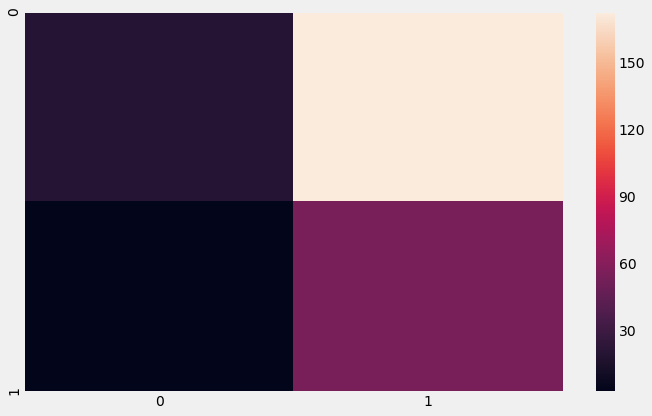

In [394]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, Y_pred))
plt.tight_layout()

In [395]:
fpr, tpr, threshold = roc_curve(y_test, Y_pred)
print(auc(fpr,tpr), threshold)

0.5262212643678161 [2 1 0]


In [396]:
# Stochastic Gradient Descent

sgd = SGDClassifier(random_state=seed)
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_test, y_test) * 100, 2)
acc_sgd
p_score = round(precision_score(y_test,Y_pred,average='binary')*100,2)
r_score = round(recall_score(y_test,Y_pred,average='binary')*100,2)
f1 = round(f1_score(y_test,Y_pred,average='binary')*100,2)
print(f'Score: {acc_sgd}, Precision: {p_score}, Recall: {r_score} F1-Score {f1}')

Score: 27.6, Precision: 24.05, Recall: 98.28 F1-Score 38.64


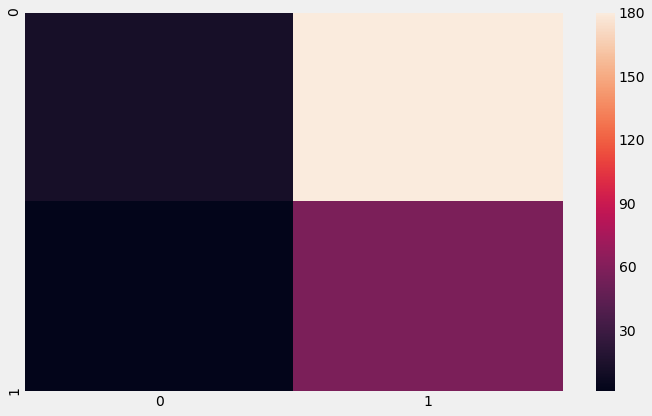

In [397]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, Y_pred))
plt.tight_layout()

In [398]:
fpr, tpr, threshold = roc_curve(y_test, Y_pred)
print(auc(fpr,tpr), threshold)

0.5226293103448276 [2 1 0]


In [399]:
# Decision Tree

decision_tree = DecisionTreeClassifier(random_state=seed)
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)
acc_decision_tree
p_score = round(precision_score(y_test,Y_pred,average='binary')*100,2)
r_score = round(recall_score(y_test,Y_pred,average='binary')*100,2)
f1 = round(f1_score(y_test,Y_pred,average='binary')*100,2)
print(f'Score: {acc_decision_tree}, Precision: {p_score}, Recall: {r_score} F1-Score {f1}')

Score: 58.0, Precision: 22.35, Recall: 32.76 F1-Score 26.57


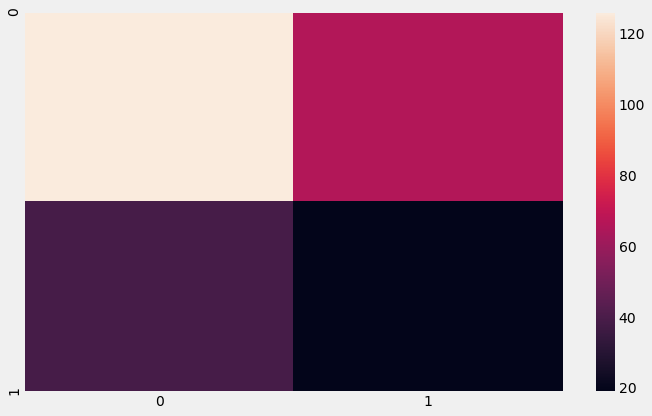

In [400]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, Y_pred))
plt.tight_layout()

In [401]:
fpr, tpr, threshold = roc_curve(y_test, Y_pred)
print(auc(fpr,tpr), threshold)

0.4919181034482758 [2 1 0]


In [402]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100,random_state=seed)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_test, y_test)
acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
acc_random_forest
p_score = round(precision_score(y_test,Y_pred,average='binary')*100,2)
r_score = round(recall_score(y_test,Y_pred,average='binary')*100,2)
f1 = round(f1_score(y_test,Y_pred,average='binary')*100,2)
print(f'Score: {acc_random_forest}, Precision: {p_score}, Recall: {r_score} F1-Score {f1}')

Score: 82.0, Precision: 67.57, Recall: 43.1 F1-Score 52.63


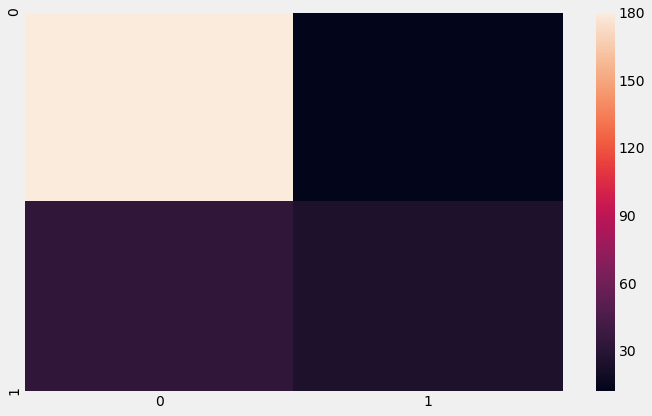

In [403]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, Y_pred))
plt.tight_layout()

In [404]:
fpr, tpr, threshold = roc_curve(y_test, Y_pred)
print(auc(fpr,tpr), threshold)

0.6842672413793103 [2 1 0]


## Initial summary

In [405]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False).T

,3,0,4,2,1,7,6,5
Model,Random Forest,Support Vector Machines,Naive Bayes,Logistic Regression,KNN,Decision Tree,Linear SVC,Stochastic Gradient Decent
Score,82,73.6,63.6,62.8,58.8,58,30,27.6


In [406]:
importances = random_forest.feature_importances_
importance_df = pd.DataFrame(importances).T
importance_df.columns = X_train.columns
importance_df.T.head()

,0
months_as_customer,0.034542
policy_deductable,0.009747
policy_annual_premium,0.041704
umbrella_limit,0.010503
capital-gains,0.022175


In [407]:
importance_df_sorted=pd.DataFrame(importance_df.T[0].sort_values())
importance_df_sorted[::-1].head(10)

,0
Minor Damage,0.075788
Total Loss,0.063672
property_claim,0.056317
chess,0.046262
policy_annual_premium,0.041704
injury_claim,0.039936
months_as_customer,0.034542
timeline,0.033943
auto_year,0.027074
incident_month,0.026598


## Regularization

In [191]:
import statsmodels
from sklearn.linear_model import Ridge, Lasso, ElasticNet, ElasticNetCV

## Next steps

#### pipeline, grid search, k-fold cross validation, XGboost, hypothesis testing